# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Regani Awalludin
- **Email:** reganiawalludin69@gmail.com
- **ID Dicoding:** regani_awalludin

## Menentukan Pertanyaan Bisnis

- Apa faktor yang mempengaruhi jumlah peminjaman sepeda (cnt)?
- Bagaimana tren peminjaman sepeda berdasarkan Musim dan Jam?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [75]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [76]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- terdapat column 'hr' pada tabel hour, sementara tidak pada tabel day
- tabel day kalkulasi per-hari, sementara tabel hour per-jam (terlihat pada 'dteday')

### Assessing Data

### **Day Table**

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### **Hour Table**

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- pada kedua tabel, column dteday memiliki data type yang tidak sesuai
- kedua tabel tidak terdapat missing value

### Cleaning Data

In [10]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [12]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- kolom 'dteday' dari tabel days, berubah menjadi type data datetime
- kolom 'dteday' dari tabel hours, berubah menjadi type data datetime

## Exploratory Data Analysis (EDA)

### Explore dataset `hours.csv`

In [14]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [15]:
hour_df.groupby('hr')['cnt'].sum()

hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: cnt, dtype: int64

### Explore dataset `days.csv`

In [16]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [17]:
day_df.groupby('dteday')['cnt'].sum()

dteday
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-27    2114
2012-12-28    3095
2012-12-29    1341
2012-12-30    1796
2012-12-31    2729
Name: cnt, Length: 731, dtype: int64

In [18]:
day_df.groupby('mnth')['cnt'].sum()

mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64

In [19]:
day_df.groupby('season')['cnt'].sum()

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64

In [20]:
day_df.groupby('yr')['cnt'].sum()

yr
0    1243103
1    2049576
Name: cnt, dtype: int64

**Insight:**
- berbagai macam versi dari rentang waktu terhadap total peminjaman
- data pertahun hanya 2 tahun saja (2011-2012)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Analisis faktor yang mempengaruhi jumlah peminjaman sepeda

In [21]:
def create_daily_summary(df):
    daily_summary = df.groupby(df['dteday'].dt.date).agg({
        'cnt': 'sum',
        'temp': 'mean',
        'hum': 'mean'
    }).reset_index()
    daily_summary.rename(columns={'dteday': 'date'}, inplace=True)
    return daily_summary

In [22]:
daily_summary = create_daily_summary(day_df)

daily_summary.head()

,date,cnt,temp,hum
0,2011-01-01,985,0.344167,0.805833
1,2011-01-02,801,0.363478,0.696087
2,2011-01-03,1349,0.196364,0.437273
3,2011-01-04,1562,0.200000,0.590435
4,2011-01-05,1600,0.226957,0.436957


In [23]:
total_rentals = daily_summary['cnt'].sum()
print(f"Jumlah total peminjaman sepeda adalah: {total_rentals}")

Jumlah total peminjaman sepeda adalah: 3292679


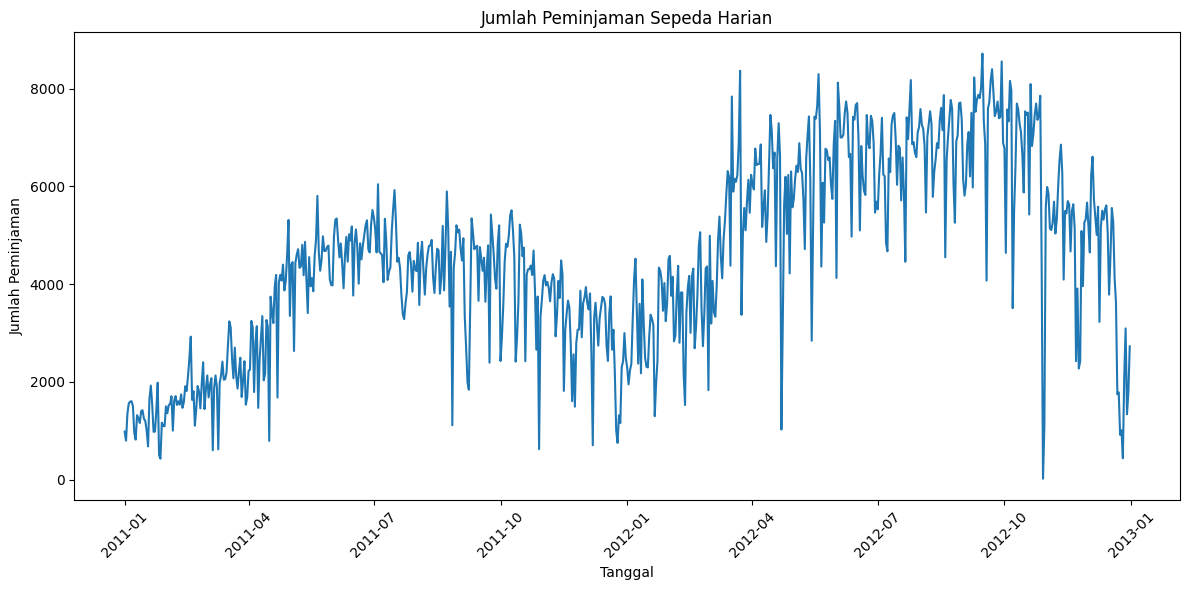

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_summary, x='date', y='cnt')
plt.title('Jumlah Peminjaman Sepeda Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

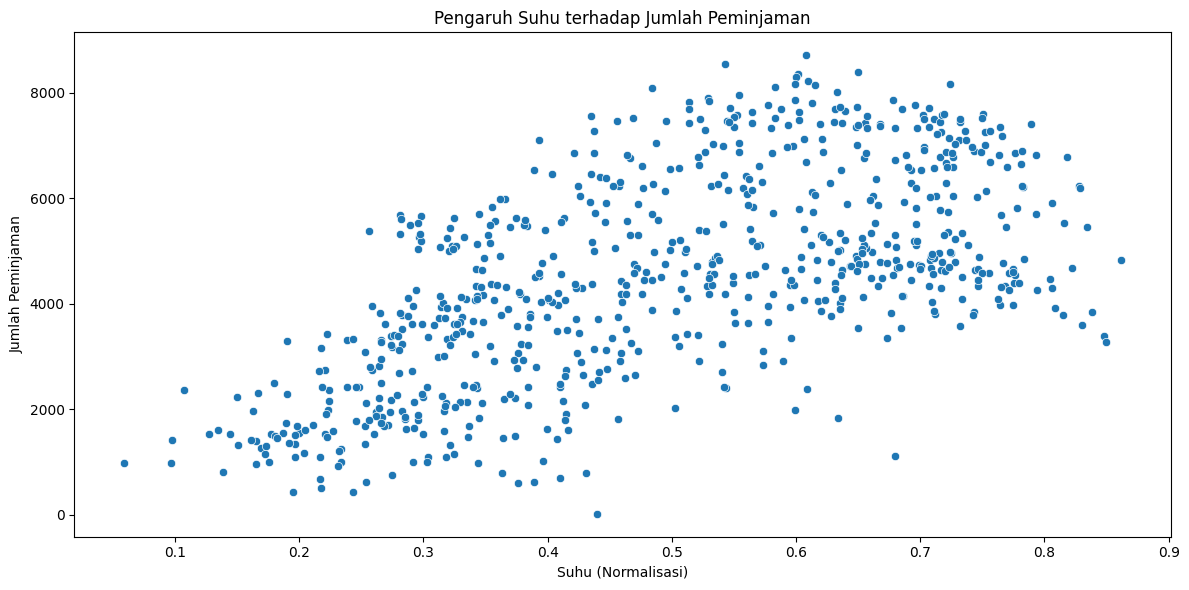

In [25]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=daily_summary, x='temp', y='cnt')
plt.title('Pengaruh Suhu terhadap Jumlah Peminjaman')
plt.xlabel('Suhu (Normalisasi)')
plt.ylabel('Jumlah Peminjaman')
plt.tight_layout()
plt.show()

In [26]:
correlation = daily_summary[['temp', 'cnt']].corr().iloc[0, 1]
print(f"Koefisien Korelasi antara Suhu dan Jumlah Peminjaman: {correlation:.2f}")

Koefisien Korelasi antara Suhu dan Jumlah Peminjaman: 0.63


### Pertanyaan 2: Analisis tren peminjaman sepeda berdasarkan Musim dan Jam?

C:\Users\FTMGENOSE\AppData\Local\Temp\ipykernel_7200\3237834636.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.index, y=season_counts.values, palette=colors)


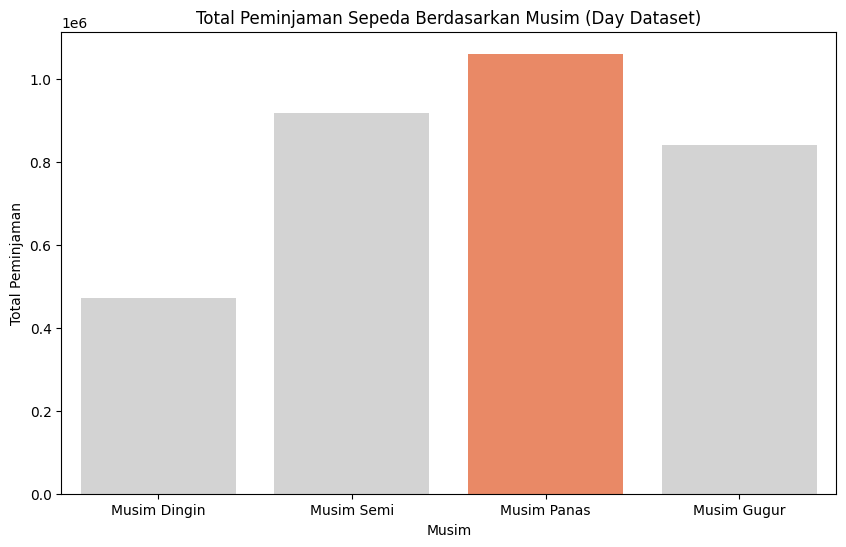

In [29]:
season_counts = day_df.groupby('season')['cnt'].sum()

# Mengganti label musim
season_labels = {1: 'Musim Dingin', 2: 'Musim Semi', 3: 'Musim Panas', 4: 'Musim Gugur'}
season_counts.index = season_counts.index.map(season_labels)

colors = ['lightgray'] * len(season_counts) 
colors[2] = 'coral'

plt.figure(figsize=(10, 6))
sns.barplot(x=season_counts.index, y=season_counts.values, palette=colors)
plt.title('Total Peminjaman Sepeda Berdasarkan Musim (Day Dataset)')
plt.xlabel('Musim')
plt.ylabel('Total Peminjaman')
plt.show()

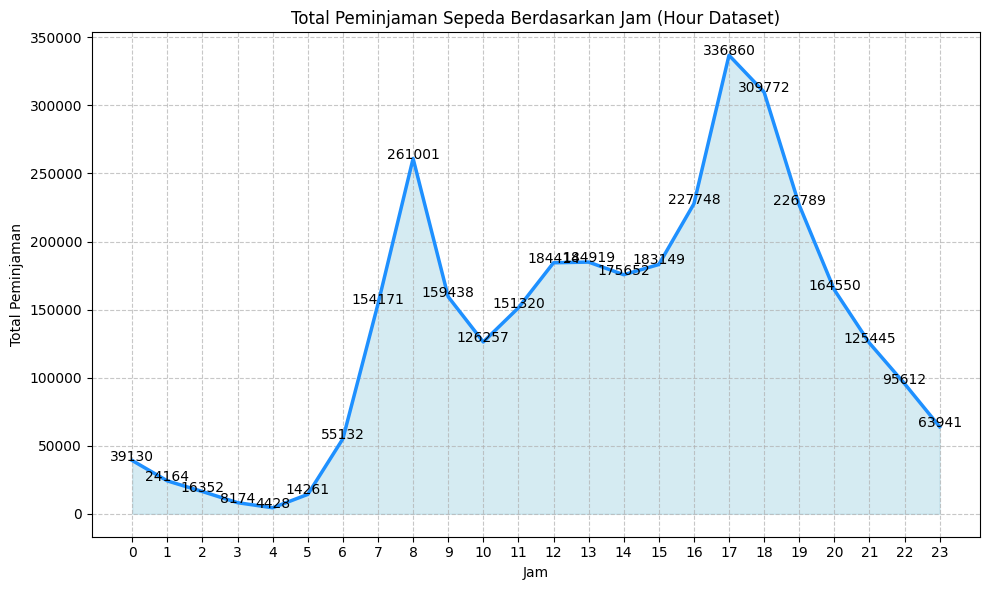

In [34]:
hourly_counts = hour_df.groupby('hr')['cnt'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, markers='o', linewidth=2.5, color='dodgerblue')
plt.fill_between(hourly_counts.index, hourly_counts.values, color='lightblue', alpha=0.5)
plt.title('Total Peminjaman Sepeda Berdasarkan Jam (Hour Dataset)')
plt.xlabel('Jam')
plt.ylabel('Total Peminjaman')
plt.xticks(range(0, 24))  # Set x-ticks untuk setiap jam
plt.grid(True, linestyle='--', alpha=0.7)

for i in range(len(hourly_counts)):
    plt.text(i, hourly_counts.values[i] + 2, str(hourly_counts.values[i]), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

**Insight:**
- colelasi mendekati 1 sehingga terdapat hubungan diantaranya
- pada musim panas peminjamam meningkat, pada jam 8 pagi dan jam 5 sore peminjaman meningkat

## Analisis Lanjutan (Opsional)

### 1. RFM Analysis

In [44]:
# RFM Casual Users
casual_rfm = day_df.groupby(by="dteday").agg({
    "casual": "sum",  
}).reset_index()

casual_rfm.columns = ["last_rental_date", "monetary"]
casual_rfm["frequency"] = casual_rfm["monetary"]  # frequency = total pinjam (dianggap sama karena tidak tahu pasti harga per-pinjam)
recent_date_casual = day_df['dteday'].max()
casual_rfm["recency"] = (recent_date_casual - casual_rfm["last_rental_date"]).dt.days

# RFM Registered Users
registered_rfm = day_df.groupby(by="dteday").agg({
    "registered": "sum",  
}).reset_index()

registered_rfm.columns = ["last_rental_date", "monetary"]
registered_rfm["frequency"] = registered_rfm["monetary"]  # frequency = total pinjam (dianggap sama karena tidak tahu pasti harga per-pinjam)
recent_date_registered = day_df['dteday'].max()
registered_rfm["recency"] = (recent_date_registered - registered_rfm["last_rental_date"]).dt.days

# Display RFM 
print("Casual User RFM:")
print(casual_rfm.head())

print("\nRegistered User RFM:")
print(registered_rfm.head())

Casual User RFM:
  last_rental_date  monetary  frequency  recency
0       2011-01-01       331        331      730
1       2011-01-02       131        131      729
2       2011-01-03       120        120      728
3       2011-01-04       108        108      727
4       2011-01-05        82         82      726

Registered User RFM:
  last_rental_date  monetary  frequency  recency
0       2011-01-01       654        654      730
1       2011-01-02       670        670      729
2       2011-01-03      1229       1229      728
3       2011-01-04      1454       1454      727
4       2011-01-05      1518       1518      726


#### Viusalisasi RFM

C:\Users\FTMGENOSE\AppData\Local\Temp\ipykernel_7200\3752418297.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="last_rental_date", data=casual_rfm.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\FTMGENOSE\AppData\Local\Temp\ipykernel_7200\3752418297.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="last_rental_date", data=casual_rfm.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\FTMGENOSE\AppData\Local\Temp\ipykernel_7200\3752418297.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `

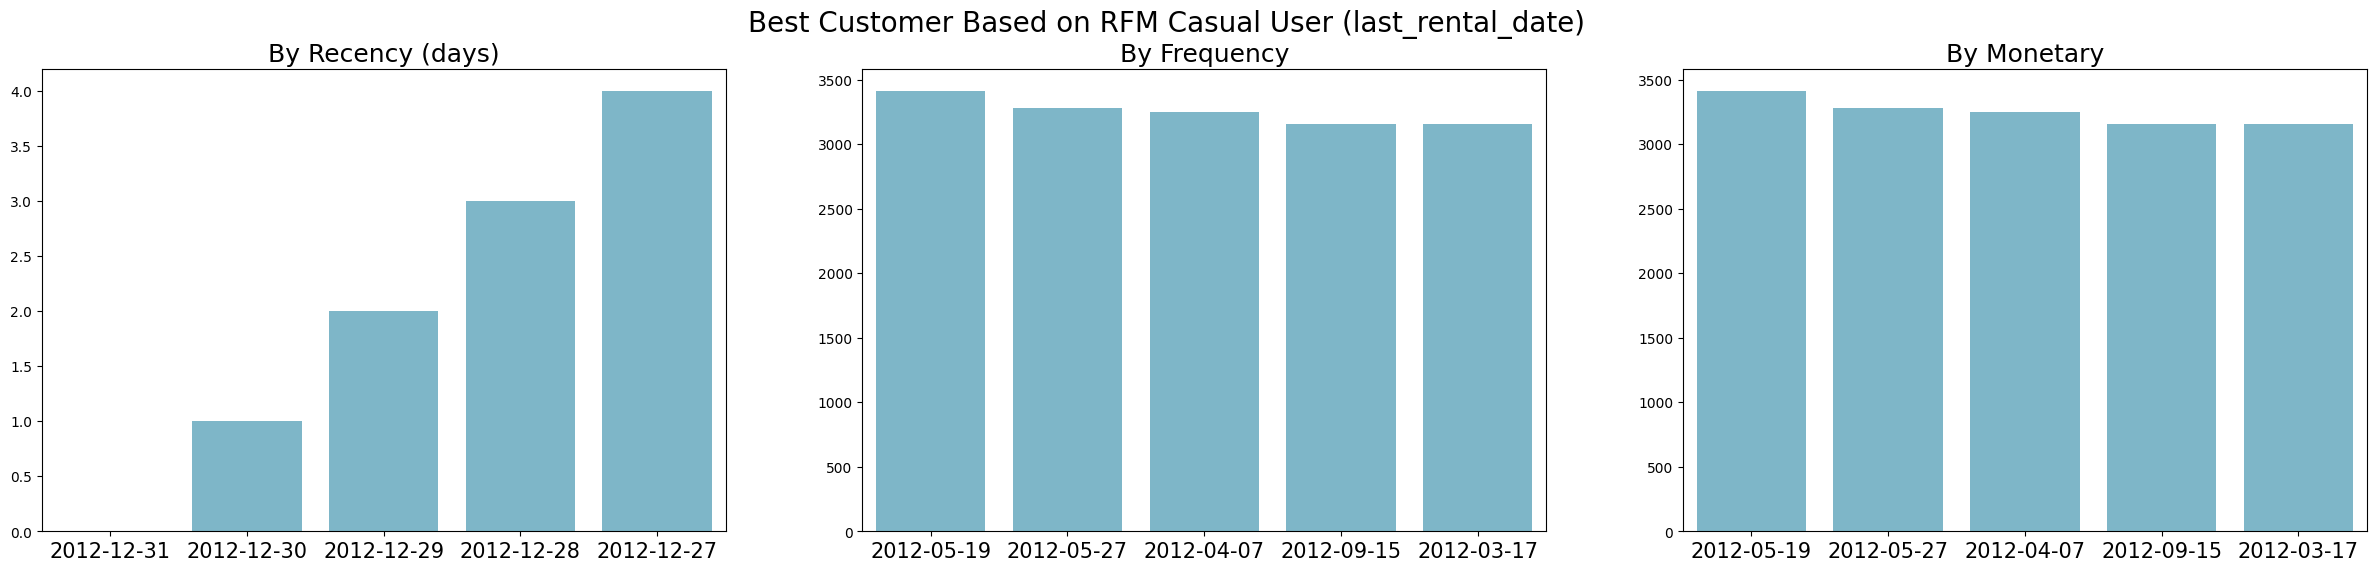

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(y="recency", x="last_rental_date", data=casual_rfm.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(y="frequency", x="last_rental_date", data=casual_rfm.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(y="monetary", x="last_rental_date", data=casual_rfm.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Best Customer Based on RFM Casual User (last_rental_date)", fontsize=20)
plt.show()

### 2. Clustering Temperature Category

  Temperature Category  Count
0                 Warm   2757
1                 Mild   1682
2                 Cool    331
3            Very Cold      0


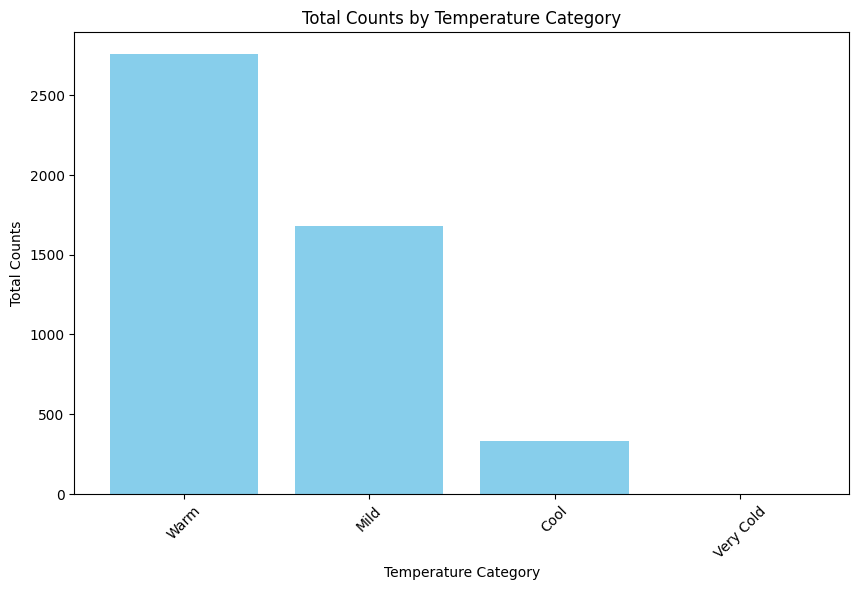

In [74]:
bins = [-0.10, 0, 0.15, 0.25, 0.35]  
labels = ['Very Cold', 'Cool', 'Mild', 'Warm']  

hour_df['temp_category'] = pd.cut(hour_df['temp'], bins=bins, labels=labels, include_lowest=True)

grouped = hour_df['temp_category'].value_counts().reset_index()
grouped.columns = ['Temperature Category', 'Count']

print(grouped)

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(grouped['Temperature Category'], grouped['Count'], color='skyblue')
plt.title('Total Counts by Temperature Category')
plt.xlabel('Temperature Category')
plt.ylabel('Total Counts')
plt.xticks(rotation=45)
plt.show()

## Conclusion

- Faktor suhu (cuaca). Dari kedua dataset, temp dan hum menunjukkan hubungan yang kuat dengan cnt. Semakin tinggi suhu, semakin banyak peminjaman sepeda.
- Dari dataset day.csv, musim panas menunjukkan total peminjaman tertinggi. Dari dataset hour.csv, peminjaman paling tinggi terjadi pada jam-jam sibuk, seperti pagi dan sore.